In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Business Analytics /Dataset/OnlineRetail.xlsx')
#df=pd.read_excel('OnlineRetail.xlsx')

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
df.shape

(541909, 8)

In [ ]:
df_cleaned=df[df['Quantity']>0]
df_cleaned=df_cleaned[df_cleaned['Description'].str.contains(".*?", na=False)]

In [ ]:
df_cleaned=df_cleaned.dropna()

In [ ]:
df_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#df_cleaned.to_excel("output.xlsx")

## Association Rules

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
df_cleaned['Description'] = df_cleaned['Description'].str.strip()

In [ ]:
basket = df_cleaned[df_cleaned['Country'] =="France"].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().set_index('InvoiceNo')


In [ ]:
basket_encoded=basket.applymap(lambda x: True if x > 0 else False)

C:\Users\gauta\AppData\Local\Temp\ipykernel_26960\1033772510.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded=basket.applymap(lambda x: True if x > 0 else False)


In [ ]:
#basket.columns
#basket['10 COLOUR SPACEBOY PEN'].to_excel("output1.xlsx")

In [ ]:
frequent_itemsets = apriori(basket_encoded, min_support=0.15, use_colnames=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.154242,(LUNCH BAG RED RETROSPOT)
1,0.169666,(PLASTERS IN TIN CIRCUS PARADE)
2,0.172237,(PLASTERS IN TIN WOODLAND ANIMALS)
3,0.771208,(POSTAGE)
4,0.187661,(RABBIT NIGHT LIGHT)
5,0.179949,(RED TOADSTOOL LED NIGHT LIGHT)
6,0.159383,(ROUND SNACK BOXES SET OF4 WOODLAND)
7,0.167095,"(POSTAGE, RABBIT NIGHT LIGHT)"
8,0.159383,"(POSTAGE, RED TOADSTOOL LED NIGHT LIGHT)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                       antecedents                      consequents   support  \
0                        (POSTAGE)             (RABBIT NIGHT LIGHT)  0.167095   
1             (RABBIT NIGHT LIGHT)                        (POSTAGE)  0.167095   
2                        (POSTAGE)  (RED TOADSTOOL LED NIGHT LIGHT)  0.159383   
3  (RED TOADSTOOL LED NIGHT LIGHT)                        (POSTAGE)  0.159383   

   confidence      lift  
0    0.216667  1.154566  
1    0.890411  1.154566  
2    0.206667  1.148476  
3    0.885714  1.148476  


## K-means clustering


## 1. Customer Segmentation

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [ ]:
df_cleaned.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
new_df=df_cleaned
new_df['TotalExpenditure']=new_df['Quantity']*new_df['UnitPrice']
new_df['InvoiceDate']=new_df['InvoiceDate'].dt.date
new_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalExpenditure
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [ ]:
#Aggregate Data by CustomerID
#https://www.w3schools.com/python/pandas/ref_df_agg.asp

customer_df = new_df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalExpenditure': 'sum',  # Total amount spent
    'InvoiceNo': 'count',  # Frequency of purchases (Number of invoices)
    'InvoiceDate': lambda x: (datetime.today().date() - x.max()).days  # Recency (days since last purchase)
})

In [ ]:
customer_df.head(5)

,Quantity,TotalExpenditure,Frequency,Recency
CustomerID,,,,
12346.0,74215,77183.60,1,5010
12347.0,2458,4310.00,182,4687
12348.0,2341,1797.24,31,4760
12349.0,631,1757.55,73,4703
12350.0,197,334.40,17,4995


In [ ]:
customer_df.rename(columns={
    'InvoiceNo': 'Frequency',
    'InvoiceDate': 'Recency'
}, inplace=True)

In [ ]:
#Standardizing

scaled_df = StandardScaler().fit_transform(customer_df)

In [ ]:
scaled_df[:5]

array([[14.44520088,  8.35963391, -0.39651214,  2.32967293],
       [ 0.25000604,  0.25104636,  0.39468767, -0.90044877],
       [ 0.22686074, -0.02854645, -0.26537405, -0.17042126],
       [-0.11141683, -0.03296273, -0.08178072, -0.74044274],
       [-0.19727207, -0.19131549, -0.32657182,  2.17966728]])

D:\AppInstallationBin\Anaconda\NewFolder\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
D:\AppInstallationBin\Anaconda\NewFolder\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
D:\AppInstallationBin\Anaconda\NewFolder\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


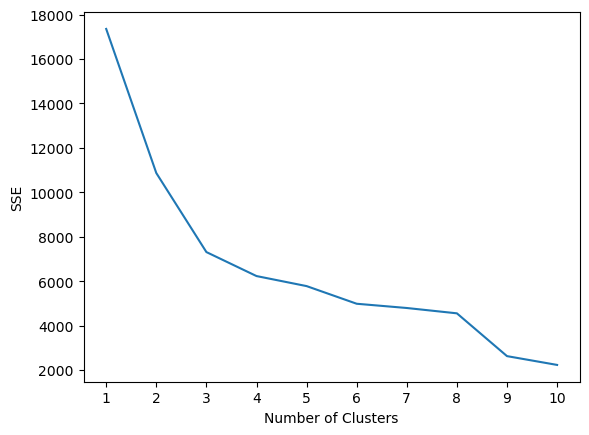

In [ ]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
kmeans.labels_

array([2, 1, 1, ..., 1, 1, 1])

In [ ]:
customer_df['cluster'] = kmeans.labels_

In [ ]:
customer_df.head(5)

,Quantity,TotalExpenditure,Frequency,Recency,cluster
CustomerID,,,,,
12346.0,74215,77183.60,1,5010,2
12347.0,2458,4310.00,182,4687,1
12348.0,2341,1797.24,31,4760,1
12349.0,631,1757.55,73,4703,1
12350.0,197,334.40,17,4995,0


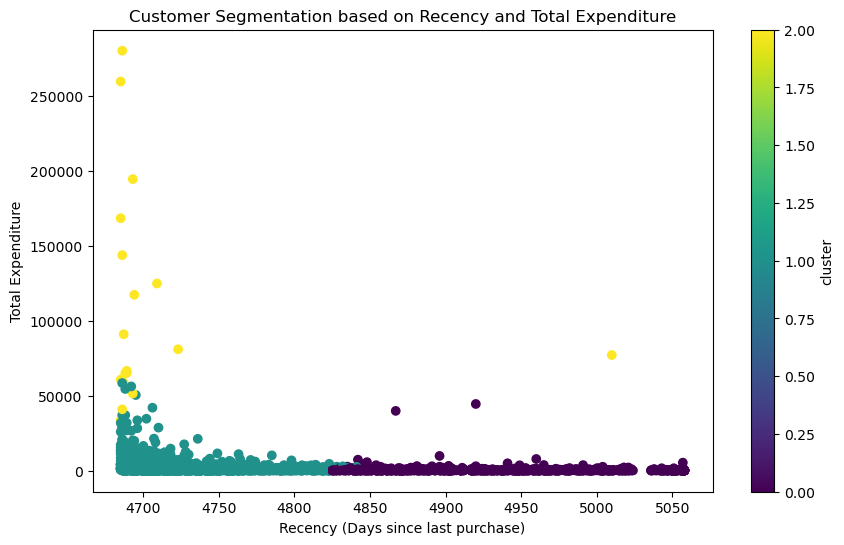

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(customer_df['Recency'], customer_df['TotalExpenditure'], c=customer_df['cluster'], cmap='viridis', marker='o')
plt.title('Customer Segmentation based on Recency and Total Expenditure')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Total Expenditure')
plt.colorbar(label='cluster')
plt.show()

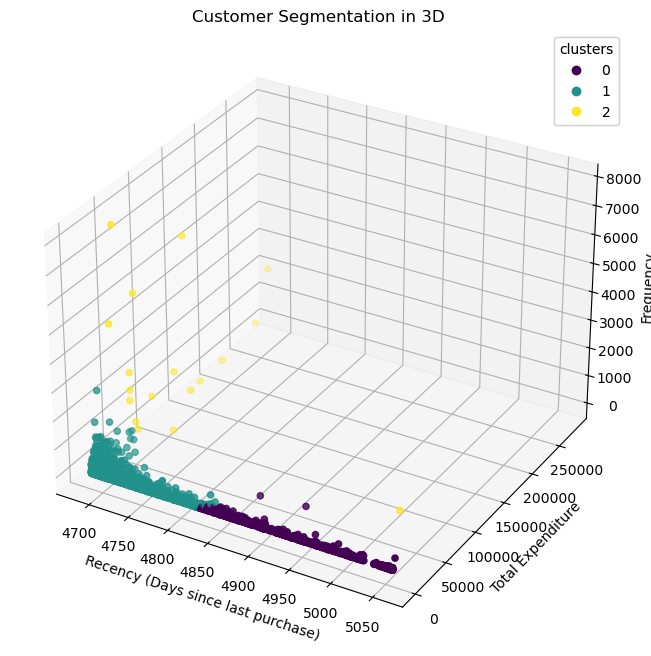

In [ ]:
# Required Libraries for 3D Plot
from mpl_toolkits.mplot3d import Axes3D


# Create a 3D scatter plot for three features: Recency, TotalExpenditure, and Frequency
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters based on Recency, Total Expenditure, and Frequency
scatter = ax.scatter(
    customer_df['Recency'],
    customer_df['TotalExpenditure'],
    customer_df['Frequency'],
    c=customer_df['cluster'],
    cmap='viridis',
    marker='o'
)

# Labeling the axes
ax.set_title('Customer Segmentation in 3D')
ax.set_xlabel('Recency (Days since last purchase)')
ax.set_ylabel('Total Expenditure')
ax.set_zlabel('Frequency')

# Add a color bar to show cluster labels
legend1 = ax.legend(*scatter.legend_elements(), title="clusters", loc="upper right")
ax.add_artist(legend1)

plt.show()
